In [1]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
from synkit.IO import rsmi_to_its, rsmi_to_graph
from wp1_functions import save_subsets_as_tsv, split_all_data_into_subsets
from chem_graph_handling import visualize_graph


## Loading the Dataset

This cell loads the cleaned reaction dataset from a TSV file into a pandas DataFrame and prints a small preview to verify that the data was read correctly.

In [2]:
dataset = "schneider50k_clean.tsv"
data = pd.read_csv(dataset, sep="\t")  # Tab-separierte Datei einlesen
print("Datenvorschau:")
print(data.head())


Datenvorschau:
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                        original_rxn rxn_class      source  \
0  [CH3:17][S:14](=[O:15])(=[O:16])[N:11]1[CH2:10...     6.1.5  US06887874   
1  O.O.[Na+].[CH3:1][c:2]1[cH:7][c:6]([N+:8](=O)[...     7.1.1  US07056926   
2  [CH3:1][O:2][c:3]1[cH:4][cH:5][c:6](-[c:9]2[cH...     1.8.5  US08492378   
3  Cl.[CH3:43][CH2:42][S:44](=[O:45])(=[O:46])Cl....     2.2.3  US08592454   
4  [CH3:25][O:24][c:21]1[cH:22][cH:23][c:17]([O:1...     1.3.7  US06716851   

                                           clean_rxn  
0  [CH3:17][S:14](=[O:15])(=[O:16])[N:11]1[CH2:10...  
1  [CH3:1][c:2]1[cH:7][c:6]([N+:8](=O)[O-])[cH:5]...  
2  [CH3:1][O:2][c:3]1[cH:4][cH:5][c:6](-[c:9]2[cH...  
3  [CH3:43][CH2:42][S:44](=[O:45])(=[O:46])Cl.[CH...  
4  [CH3:25][O:24][c:21]1[cH:22][cH:23][c:17]([O:1...  

In [3]:
print("\nAnalyse der Reaktionsklassen:")
class_counts = data["rxn_class"].value_counts()
print(f"Anzahl der Klassen: {len(class_counts)}")
print("Beispiele pro Klasse:")
print(class_counts)


Analyse der Reaktionsklassen:
Anzahl der Klassen: 50
Beispiele pro Klasse:
rxn_class
6.1.5     1000
3.3.1     1000
1.3.8     1000
1.3.6     1000
3.1.5     1000
6.2.3     1000
3.4.1     1000
6.1.3     1000
1.7.6     1000
10.1.2    1000
9.1.6     1000
10.1.5    1000
10.4.2    1000
7.1.1     1000
6.3.1     1000
1.7.7     1000
7.9.2     1000
8.1.5     1000
1.7.4     1000
7.2.1     1000
8.1.4     1000
8.2.1     1000
7.3.1     1000
2.1.7     1000
9.3.1     1000
6.1.1     1000
6.3.7     1000
2.1.2     1000
1.8.5     1000
2.2.3     1000
1.3.7     1000
1.7.9     1000
6.2.2     1000
2.7.2     1000
2.6.1     1000
1.6.8     1000
3.1.1     1000
1.6.2     1000
1.2.1     1000
1.6.4     1000
1.2.5     1000
2.3.1     1000
5.1.1     1000
10.1.1    1000
2.1.1     1000
2.6.3     1000
6.2.1     1000
10.2.1    1000
1.2.4     1000
3.1.6     1000
Name: count, dtype: int64


TODO: 

- ~~varied random subsets of 3-5 classes with each 20-200 representatives~~
- build up functions to print and/or plot reactions for manual tests later on


## WP1 – Creating Class-Balanced Subsets

This cell splits the full dataset into small, class-balanced subsets.  
Each subset contains a fixed number of reaction classes and an equal number of reactions per class, which is required for WP1 experiments and manual inspection.

In [4]:
results = split_all_data_into_subsets(
    data,
    label_col="rxn_class", 
    min_classes=3,
    max_classes=3,
    min_n=20,
    max_n=20,
    seed=42,            
)

# Kurze Übersicht
for i, (_, labels, counts) in enumerate(results, start=1):
    print(f"Subset {i}: Klassen={labels}, Counts={counts}")

# Abspeichern
paths = save_subsets_as_tsv(results, out_dir="subsets_small", prefix="subset")
print("Gespeichert:", [str(p) for p in paths])

Subset 1: Klassen=['1.7.4', '3.4.1', '7.9.2'], Counts={'7.9.2': 20, '1.7.4': 20, '3.4.1': 20}
Subset 2: Klassen=['1.8.5', '3.1.6', '6.1.5'], Counts={'6.1.5': 20, '1.8.5': 20, '3.1.6': 20}
Subset 3: Klassen=['2.1.1', '2.1.7', '6.3.7'], Counts={'6.3.7': 20, '2.1.1': 20, '2.1.7': 20}
Subset 4: Klassen=['1.3.6', '2.1.1', '6.3.7'], Counts={'6.3.7': 20, '1.3.6': 20, '2.1.1': 20}
Subset 5: Klassen=['1.7.6', '10.2.1', '7.1.1'], Counts={'1.7.6': 20, '7.1.1': 20, '10.2.1': 20}
Subset 6: Klassen=['1.2.5', '1.7.9', '10.2.1'], Counts={'10.2.1': 20, '1.7.9': 20, '1.2.5': 20}
Subset 7: Klassen=['1.2.4', '1.7.6', '2.6.1'], Counts={'1.2.4': 20, '2.6.1': 20, '1.7.6': 20}
Subset 8: Klassen=['1.3.8', '2.6.1', '9.3.1'], Counts={'2.6.1': 20, '1.3.8': 20, '9.3.1': 20}
Subset 9: Klassen=['1.6.8', '2.6.3', '8.2.1'], Counts={'8.2.1': 20, '1.6.8': 20, '2.6.3': 20}
Subset 10: Klassen=['3.4.1', '6.3.7', '7.9.2'], Counts={'3.4.1': 20, '6.3.7': 20, '7.9.2': 20}
Subset 11: Klassen=['2.6.1', '6.2.2', '8.1.4'], Counts=

## Example: Visualizing a Single Reaction as an ITS Graph

This cell visualizes one selected reaction as an ITS graph, representing the entire reaction in a single graph and highlighting the bond changes between reactants and products.

Eductgraph
16 {'element': 'N', 'aromatic': False, 'hcount': 2, 'charge': 0, 'neighbors': ['C'], 'atom_map': 16}
15 {'element': 'C', 'aromatic': True, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C', 'N'], 'atom_map': 15}
17 {'element': 'C', 'aromatic': True, 'hcount': 1, 'charge': 0, 'neighbors': ['C', 'C'], 'atom_map': 17}
18 {'element': 'C', 'aromatic': True, 'hcount': 1, 'charge': 0, 'neighbors': ['C', 'C'], 'atom_map': 18}
12 {'element': 'C', 'aromatic': True, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C', 'F'], 'atom_map': 12}
11 {'element': 'F', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['C'], 'atom_map': 11}
13 {'element': 'C', 'aromatic': True, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C', 'C'], 'atom_map': 13}
19 {'element': 'C', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'F', 'F', 'F'], 'atom_map': 19}
20 {'element': 'F', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['C'], 'atom_map': 20}
21 {'element': 'F', 'aromatic'

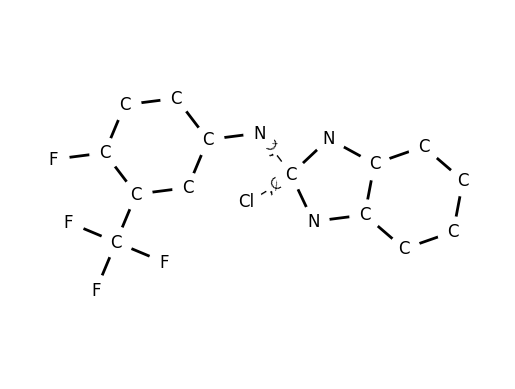

In [5]:
rmsi = data["clean_rxn"].iloc[9]
visualize_graph(rmsi)

## WP1 – Manual Inspection of Reaction Graphs
As part of WP1, this cell visualizes reactants, products, and the ITS graph of selected reactions to manually verify correct graph construction.

Educts show the molecules before the reaction.  
Products show the molecules after the reaction.  
The ITS graph combines both and highlights what changes during the reaction.

Eductgraph
16 {'element': 'N', 'aromatic': False, 'hcount': 2, 'charge': 0, 'neighbors': ['C'], 'atom_map': 16}
15 {'element': 'C', 'aromatic': True, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C', 'N'], 'atom_map': 15}
17 {'element': 'C', 'aromatic': True, 'hcount': 1, 'charge': 0, 'neighbors': ['C', 'C'], 'atom_map': 17}
18 {'element': 'C', 'aromatic': True, 'hcount': 1, 'charge': 0, 'neighbors': ['C', 'C'], 'atom_map': 18}
12 {'element': 'C', 'aromatic': True, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C', 'F'], 'atom_map': 12}
11 {'element': 'F', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['C'], 'atom_map': 11}
13 {'element': 'C', 'aromatic': True, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C', 'C'], 'atom_map': 13}
19 {'element': 'C', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'F', 'F', 'F'], 'atom_map': 19}
20 {'element': 'F', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['C'], 'atom_map': 20}
21 {'element': 'F', 'aromatic'

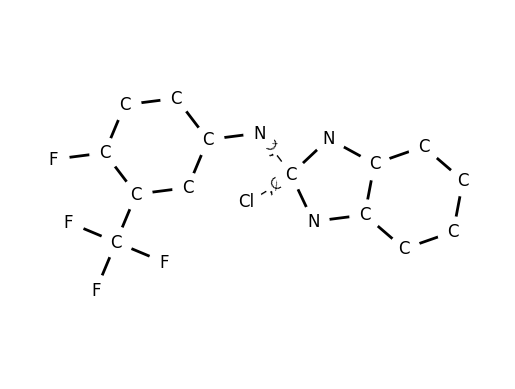

In [6]:
from vis_utils import visualize_reaction

rmsi = data["clean_rxn"].iloc[9]

visualize_reaction(rmsi)                 # ITS (default)
visualize_reaction(rmsi, which="educt")   # Edukte
visualize_reaction(rmsi, which="product") # Produkte